## Online Retail Dataset 

##### Here will be checking the monthly revenue of the online retail company based the available dataset

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime , timedelta

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read dataset from CSV
customer_transactions = pd.read_csv("OnlineRetail.csv", encoding = 'unicode_escape')

customer_transactions.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##### Let's check the shape of the dataset

In [2]:
customer_transactions.shape

(541909, 8)

In [3]:
customer_transactions.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

##### In order to calcuate the Monthly revenue we need the following
1. CustomerID
2. UnitPrice
3. Quantity 
4. InvoiceDate

***Revenue*** = *Active Customer Count* * *Order Count* * *Average Revenue per Order*

#### Let's engineer the data to get the month-wise revenue 

In [4]:
customer_transactions['InvoiceDate'] = pd.to_datetime(customer_transactions['InvoiceDate'])
customer_transactions['InvoiceYearMonth'] = customer_transactions['InvoiceDate'] \
                                            .apply(lambda x : x.strftime('%Y%m'))

# Calculate revenue column
customer_transactions['Revenue'] = customer_transactions.Quantity * customer_transactions.UnitPrice

# Create a new dataframe grouped by yearmonth and revenue
company_revenue = customer_transactions.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
company_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


##### Now that we have our dataframe of monthly revenues assembled, lets plot it !

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import plot , iplot ,init_notebook_mode
#initiate visualization library for jupyter notebook 
init_notebook_mode(connected=True)

In [6]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs

figure = go.Figure()

figure.add_trace(go.Scatter(
                            x= company_revenue['InvoiceYearMonth'] ,
                            y= company_revenue['Revenue']
                ))

figure.update_layout(title='Total Revenue per month',
                   xaxis_title='Year/Month',
                
                   yaxis_title='Revenue')
# py.iplot(figure, filename='basic-scatter')
figure.update_xaxes(type = 'category')
pio.show(figure)
# pio.show(figure)
# pio.write_html(figure, file='company_revenue.html', auto_open=True)

As seen from the plot, after Aug 2011 the Revenue has a considerable growth

#### Monthly Revenue Growth Rate:

In [7]:
company_revenue['MonthlyGrowthIn%'] = company_revenue.Revenue.pct_change()

company_revenue

,InvoiceYearMonth,Revenue,MonthlyGrowthIn%
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


In [8]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs

figure = go.Figure()

figure.add_trace(go.Scatter(
                            x= company_revenue.loc[company_revenue['InvoiceYearMonth'] < '201112']['InvoiceYearMonth'] ,
                            y= company_revenue.loc[company_revenue['InvoiceYearMonth'] < '201112']['MonthlyGrowthIn%']
                ))

figure.update_layout(title='Monthly Revenue Growth Rate',
                   xaxis_title='Year/Month',
                
                   yaxis_title='MonthlyGrowthIn%')
# py.iplot(figure, filename='basic-scatter')
# pio.show(figure)
figure.update_xaxes(type = 'category')
pio.show(figure)
# pio.write_html(figure, file='company_revenue_growth_rate.html', auto_open=True)

There was a **36.5** % Growth .
But in order to indentify why the revenue growth dipped in April 2011, we need to do some further Analysis.

#### Monthly Active Customers

In [9]:
customer_transactions.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

#### Let's concentrate on Uk's data

In [10]:
customers_uk = customer_transactions.loc[customer_transactions["Country"] == 'United Kingdom']

customers_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


Monthly Active Customers in UK :

In [11]:
customers_uk_mnth_active = customers_uk.groupby('InvoiceYearMonth').CustomerID.nunique().reset_index()
customers_uk_mnth_active = customers_uk_mnth_active.rename(columns = {'CustomerID' : 'ActiveCustomers'})
customers_uk_mnth_active

,InvoiceYearMonth,ActiveCustomers
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In [12]:
figure = go.Figure()

figure.add_trace(
                go.Bar(
                            x= customers_uk_mnth_active['InvoiceYearMonth'] ,
                            y= customers_uk_mnth_active['ActiveCustomers'] 
                            )
                )

figure.update_layout( title='Monthly Active Customers',
                       xaxis_title='Year/Month',
                       yaxis_title='No. of Customers')
# py.iplot(figure, filename='basic-scatter')
# pio.show(figure)
figure.update_xaxes(type = 'category')
pio.show(figure)
# pio.write_html(figure, file='monthly_Active_uk_customers.html', auto_open=True)

***By looking at all the data above, the dip in revenue in the month of April '11 is explicable as the no. of active customers dropped from 923 in March to 817 in April***

Now , we can verify the same for the order count as well

In [13]:
customers_uk_order_count = customers_uk.groupby('InvoiceYearMonth').Quantity.sum().reset_index()
customers_uk_order_count = customers_uk_order_count.rename(columns = {'Quantity' : 'TotalQuantityOrdered'})
customers_uk_order_count

,InvoiceYearMonth,TotalQuantityOrdered
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


![alt text](monthly_quantity_ordered_uk_customers.png "Title")


***So, as already thought of the order count declined in the month of April in comparison to March***

#### Average Revenue Per Order

In [14]:
comp_uk_avg_mnthly_revnu = customers_uk.groupby(['InvoiceYearMonth'])['Revenue'].mean().reset_index()
comp_uk_avg_mnthly_revnu = comp_uk_avg_mnthly_revnu.rename(columns = {'Revenue' : 'AvgRevenue'} )
comp_uk_avg_mnthly_revnu

,InvoiceYearMonth,AvgRevenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


In [15]:
figure = go.Figure()

figure.add_trace(
                go.Bar(
                            x= comp_uk_avg_mnthly_revnu['InvoiceYearMonth'] ,
                            y= comp_uk_avg_mnthly_revnu['AvgRevenue'] 
                            )
                )

figure.update_layout( title='Average Revenue Per Month',
                       xaxis_title='Year/Month',
                       yaxis_title='Average Revenue')
# py.iplot(figure, filename='basic-scatter')
# pio.show(figure)
figure.update_xaxes(type = 'category')
# pio.show(figure)
# pio.write_html(figure, file='monthly_averge_revenue_uk_customers.html', auto_open=True)

The average revenue dipped from March to April

We can also look at other metrics like
1. **New Customer Ratio:** A good indicator of if we are losing our existing customers or unable to attract new ones
2. **Retention Rate:** Indicates how many customers we retain over specific time window. 

#### New Customer Ratio

If a customer does his / her first purchase within the predefined time window , then we term them as a New Customer.

Here we will segregate the New Customers from the existing.

In [16]:
cust_uk_w_first_purchase = customers_uk.sort_values('InvoiceDate')
customers_history = cust_uk_w_first_purchase.groupby('CustomerID').InvoiceDate.min().reset_index()

customers_history = customers_history.rename(columns = {'InvoiceDate' : 'FirstPurchaseDate'} )
customers_history['FirstPurchaseYearMonth']= customers_history['FirstPurchaseDate'] \
                                            .apply(lambda x : x.strftime('%Y%m'))
customers_history.tail()


,CustomerID,FirstPurchaseDate,FirstPurchaseYearMonth
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101
3949,18287.0,2011-05-22 10:39:00,201105


Lets merge both the dataframes 

In [17]:
cust_uk_w_first_purchase = pd.merge( customers_uk , customers_history , on = 'CustomerID' )
cust_uk_w_first_purchase.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,FirstPurchaseDate,FirstPurchaseYearMonth
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112
361877,581416,23487,SWEET HEART CAKE CARRIER,1,2011-12-08 14:58:00,9.95,14569.0,United Kingdom,201112,9.95,2011-12-08 14:58:00,201112


In [18]:
# Create Column UserType ,
# values 'Old' : if 1st first purchase year/ month before invoice year/ month
cust_uk_w_first_purchase['UserType'] = 'New'
cust_uk_w_first_purchase.loc[cust_uk_w_first_purchase.InvoiceYearMonth > cust_uk_w_first_purchase.FirstPurchaseYearMonth ,'UserType' ] = 'Existing' 
cust_uk_w_first_purchase['UserType'].value_counts()



Existing    256114
New         105764
Name: UserType, dtype: int64

Now lets calculate the revenue per month per user type

In [19]:
cust_uk_revenue_monthwise = cust_uk_w_first_purchase.groupby(['InvoiceYearMonth' , 'UserType'])['Revenue'].sum().reset_index()
cust_uk_revenue_monthwise.sort_values( ['InvoiceYearMonth', 'UserType'], ascending=[True, True], inplace=True )
cust_uk_revenue_monthwise = cust_uk_revenue_monthwise[(cust_uk_revenue_monthwise \
                                                      .InvoiceYearMonth > '201012') & ( cust_uk_revenue_monthwise.InvoiceYearMonth < '201112' )]
cust_uk_revenue_monthwise

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


Lets plot both revenues according to the user types

In [20]:
figure = go.Figure()

figure.add_trace(
                go.Scatter(
                            x= cust_uk_revenue_monthwise.loc[cust_uk_revenue_monthwise.UserType == 'New']['InvoiceYearMonth'] ,
                            y= cust_uk_revenue_monthwise.loc[cust_uk_revenue_monthwise.UserType == 'New']['Revenue'],
                            name = 'New'
                            
                ) )

figure.add_trace(
                go.Scatter(
                            x= cust_uk_revenue_monthwise.loc[cust_uk_revenue_monthwise.UserType == 'Existing']['InvoiceYearMonth'] ,
                            y= cust_uk_revenue_monthwise.loc[cust_uk_revenue_monthwise.UserType == 'Existing']['Revenue'],
                            name = 'Existing'
                 )
            )

figure.update_layout(title='Total Revenue per month per User Type',
                   xaxis_title='Year/Month',
                
                   yaxis_title='Revenue')
# py.iplot(figure, filename='basic-scatter')
figure.update_xaxes(type = 'category')
pio.show(figure)

#### The existing customer are providing better revenue than the new ones

### New User Ratio

In [21]:
new_users = cust_uk_w_first_purchase.loc[cust_uk_w_first_purchase.UserType == 'New']
existing_users = cust_uk_w_first_purchase.loc[cust_uk_w_first_purchase.UserType == 'Existing']

new_user_ratio = new_users.groupby(['InvoiceYearMonth']).CustomerID.nunique()/ \
                               existing_users.groupby(['InvoiceYearMonth']).CustomerID.nunique()
new_user_ratio = new_user_ratio.reset_index()
new_user_ratio = new_user_ratio.dropna()
new_user_ratio = new_user_ratio[(new_user_ratio \
                                                      .InvoiceYearMonth > '201012') & ( new_user_ratio.InvoiceYearMonth < '201112' )]

new_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


In [22]:
figure = go.Figure()

figure.add_trace(
                go.Bar(
                            x= new_user_ratio['InvoiceYearMonth'] ,
                            y= new_user_ratio['CustomerID'] 
                            )
                )

figure.update_layout( title='New Customer Ratio',
                       xaxis_title='Year/Month',
                       yaxis_title='Customer Ratio')

figure.update_xaxes(type = 'category')
pio.show(figure)

#### As seen from the plot above there is a sharp decline in the New Customer Ratio

### Monthly Retention Rate

We need to monitor the number of users that were retained from the previous month

***Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total***

Lets start by calculating the total monthly revenue for each customer 

In [23]:
customer_purch_monthly = cust_uk_w_first_purchase.groupby(['CustomerID' , 'InvoiceYearMonth' ]).Revenue.sum().astype(int)
customer_purch_monthly = customer_purch_monthly.reset_index()
customer_purch_monthly.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771


***We can convert the above DataFrame to a retention table using crosstab()***

In [24]:
customer_retention = pd.crosstab(customer_purch_monthly.CustomerID , customer_purch_monthly.InvoiceYearMonth).reset_index()
customer_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


From the above table we can clearly see which customers are active on which months

In [25]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = customer_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = customer_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = customer_retention[(customer_retention[selected_month]>0) & (customer_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
customer_retention = pd.DataFrame(retention_array)
customer_retention.loc[:,'RetentionRate'] = customer_retention.RetainedUserCount/customer_retention.TotalUserCount
customer_retention

,InvoiceYearMonth,RetainedUserCount,TotalUserCount,RetentionRate
0,201102,263,714,0.368347
1,201103,305,923,0.330444
2,201104,310,817,0.379437
3,201105,369,985,0.374619
4,201106,417,943,0.442206
5,201107,379,899,0.421580
6,201108,391,867,0.450980
7,201109,417,1177,0.354291
8,201110,502,1285,0.390661
9,201111,616,1548,0.397933


In [26]:
type(customer_retention.RetentionRate)

pandas.core.series.Series

#### Monthly Retention Rate

In [27]:
figure = go.Figure()

figure.add_trace(
                go.Scatter(
                            x= customer_retention.query('InvoiceYearMonth<201112')['InvoiceYearMonth'] ,
                            y= customer_retention.query('InvoiceYearMonth<201112')['RetentionRate'],
                            name = 'organic'
                            )
                )

figure.update_layout( title='Customer Retention Per month',
                       xaxis_title='Year/Month',
                       yaxis_title='Retention Rate')

figure.update_xaxes(type = 'category')
pio.show(figure)

### Churn rate

***Churn Rate = 1 - Retention Rate***

In [28]:
customer_retention.loc[:,'ChurnRate'] = 1 - customer_retention.RetentionRate
customer_retention

,InvoiceYearMonth,RetainedUserCount,TotalUserCount,RetentionRate,ChurnRate
0,201102,263,714,0.368347,0.631653
1,201103,305,923,0.330444,0.669556
2,201104,310,817,0.379437,0.620563
3,201105,369,985,0.374619,0.625381
4,201106,417,943,0.442206,0.557794
5,201107,379,899,0.421580,0.578420
6,201108,391,867,0.450980,0.549020
7,201109,417,1177,0.354291,0.645709
8,201110,502,1285,0.390661,0.609339
9,201111,616,1548,0.397933,0.602067


In [29]:
figure = go.Figure()

figure.add_trace(
                go.Scatter(
                            x= customer_retention.query('InvoiceYearMonth<201112')['InvoiceYearMonth'] ,
                            y= customer_retention.query('InvoiceYearMonth<201112')['ChurnRate'],
                            name = 'organic'
                            )
                )

figure.update_layout( title='Customer Churn Per month',
                       xaxis_title='Year/Month',
                       yaxis_title='Churn Rate')

figure.update_xaxes(type = 'category')
pio.show(figure)

### Cohort Analysis

In [30]:
cust_uk_w_first_purchase.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,FirstPurchaseDate,FirstPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


Before we create the cohort period, lets reshape the dataframe by grouping according to the invoice_period and cohort_group labels.


We count the total number of customers and products sold in a period by their unique ids and descriptions. We then sum the quantities sold and total invoice amount to get the aggregate sales figures for the periods.

In [31]:
grouped = cust_uk_w_first_purchase.groupby(['FirstPurchaseYearMonth','InvoiceYearMonth'])
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                       'Description': pd.Series.nunique,
                      'Quantity': np.sum })
cohorts.rename(columns ={'CustomerID':'total_customers',
                         'Description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
cohorts.reset_index()
cohorts.head(10)

total_customers  total_product_types  \
FirstPurchaseYearMonth InvoiceYearMonth                                         
201012                 201012                      871.0                 2390   
                       201101                      322.0                 1757   
                       201102                      291.0                 1667   
                       201103                      329.0                 1815   
                       201104                      308.0                 1745   
                       201105                      345.0                 1817   
                       201106                      327.0                 1830   
                       201107                      304.0                 1912   
                       201108                      306.0                 1879   
                       201109                      346.0                 2046   

                                         Quantity  
FirstPurchaseYearMonth InvoiceYearMonth            
201012                 201012              252812  
                       201101              114576  
                       201102              108420  
                       201103              136347  
                       201104              116720  
                       201105              140789  
                       201106              138501  
                       201107              135905  
                       201108              154470  
                       201109              195402

In [32]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, 
    which is the Nth period based on the user's first purchase.
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [34]:
cohorts = cohorts.groupby(level = 'FirstPurchaseYearMonth').apply(cohort_period)
cohorts.reset_index()
cohorts.head()

total_customers  total_product_types  \
FirstPurchaseYearMonth InvoiceYearMonth                                         
201012                 201012                      871.0                 2390   
                       201101                      322.0                 1757   
                       201102                      291.0                 1667   
                       201103                      329.0                 1815   
                       201104                      308.0                 1745   

                                         Quantity  CohortPeriod  
FirstPurchaseYearMonth InvoiceYearMonth                          
201012                 201012              252812             1  
                       201101              114576             2  
                       201102              108420             3  
                       201103              136347             4  
                       201104              116720             5

In [54]:
cohorts_size = cohorts['total_customers'].groupby(level = 'FirstPurchaseYearMonth').first()
cohorts.reset_index()
cohorts.set_index(['CohortPeriod'])
cohorts.head()

total_customers  total_product_types  \
FirstPurchaseYearMonth InvoiceYearMonth                                         
201012                 201012                      871.0                 2390   
                       201101                      322.0                 1757   
                       201102                      291.0                 1667   
                       201103                      329.0                 1815   
                       201104                      308.0                 1745   

                                         Quantity  CohortPeriod  
FirstPurchaseYearMonth InvoiceYearMonth                          
201012                 201012              252812             1  
                       201101              114576             2  
                       201102              108420             3  
                       201103              136347             4  
                       201104              116720             5

In [55]:
user_retentions = (cohorts['total_customers'].unstack('FirstPurchaseYearMonth')).divide(cohorts_size , axis = 1 )
user_retentions.head()

FirstPurchaseYearMonth,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201012,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201101,0.369690,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201102,0.334099,0.232044,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201103,0.377727,0.279006,0.250737,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201104,0.353617,0.245856,0.191740,0.193627,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


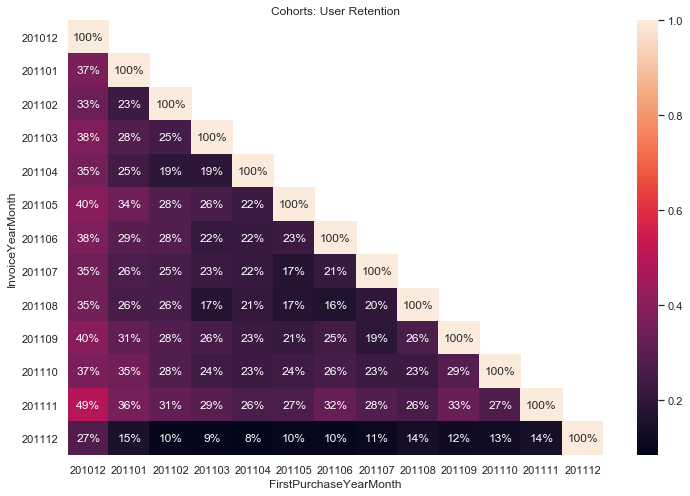

In [60]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retentions, mask=user_retentions.isnull(), annot=True, fmt='.0%')